<a href="https://colab.research.google.com/github/alirezash97/Cardio/blob/master/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install git+https://github.com/analysiscenter/cardio.git

  Cloning https://github.com/analysiscenter/cardio.git to /tmp/pip-req-build-lmmfqj1q
  Running command git clone -q https://github.com/analysiscenter/cardio.git /tmp/pip-req-build-lmmfqj1q
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 12.4MB 342kB/s 
     |████████████████████████████████| 35.3MB 93kB/s 
     |████████████████████████████████| 1.1MB 47.9MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 194kB 51.9MB/s 
     |████████████████████████████████| 163kB 55.9MB/s 
  Created wheel for cardio: filename=cardio-0.3.0-cp36-none-any.whl size=248078 sha256=eebab913ca7a8040a5ca5f55024462f2c91c743e4b471a296fee57e1b7441ecc
  Stored in directory: /tmp/pip-ephem-wheel-cache-7honxvkc/wheels/4c/29/94/e3046a28c95e8529c92d4b1563d248ecc3736988ac1ddbd624
  Created wheel for pyedflib: filename=pyEDFlib-0.1.17-cp36-cp36m-linux_x86_64.whl size=927003 sha256=097161ccfb43053123116929b23fca6587

In [0]:
import cardio
import wfdb

In [0]:
import requests  
file_url = "https://physionet.org/static/published-projects/challenge-2017/af-classification-from-a-short-single-lead-ecg-recording-the-physionet-computing-in-cardiology-challenge-2017-1.0.0.zip"
    
r = requests.get(file_url, stream = True)  
  
with open("/content/drive/My Drive/Cardio/training2017.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)  

In [0]:
!unzip '/content/cardio dataset/training2017.zip'

In [0]:
import sys
import numpy as np

from matplotlib import pyplot as plt

sys.path.append('/content/training2017')

import cardio.batchflow as bf
index = bf.FilesIndex(path='/content/training2017/A*.hea', no_ext=True, sort=True)

In [0]:
print(index.indices)

['A00001' 'A00002' 'A00003' ... 'A08526' 'A08527' 'A08528']


In [0]:
from cardio import EcgBatch
eds = bf.Dataset(index, batch_class=EcgBatch)

In [0]:
from cardio import EcgDataset
eds = EcgDataset(path='/content/training2017/*.hea', no_ext=True, sort=True)

In [0]:
batch = eds.next_batch(batch_size=60, unique_labels=['A', 'N', 'O'])

In [0]:
batch_with_data = batch.load(fmt='wfdb', components=['signal', 'meta'])

In [0]:
batch_with_data['A00001'].meta

In [0]:
batch_with_data['A00001'].signal

In [0]:
batch_with_data = batch_with_data.load(src='/content/training2017/REFERENCE.csv', fmt='csv', components='target')

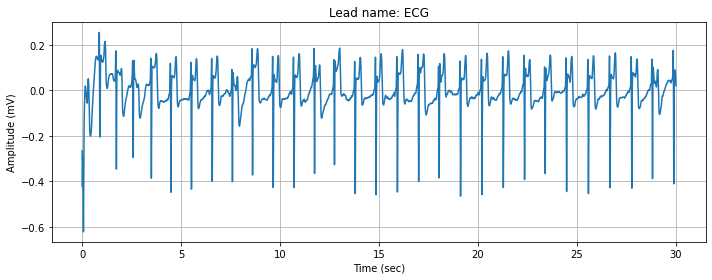

In [0]:
batch_with_data.show_ecg('A00006')

In [0]:
batch_with_data['A00006'].target 

'N'

In [0]:
original_batch = batch_with_data.deepcopy()
changed_batch = batch_with_data.deepcopy()

In [0]:
changed_batch = changed_batch.flip_signals()

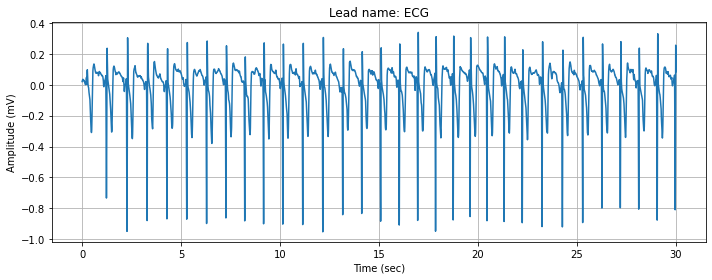

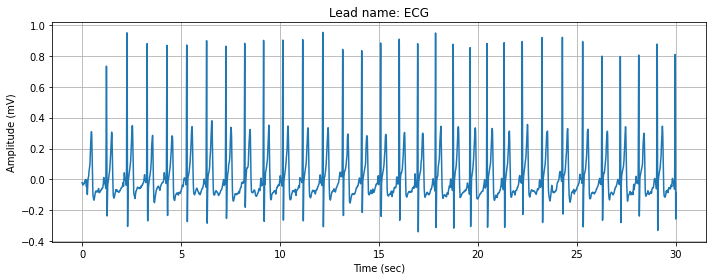

In [0]:
original_batch.show_ecg('A00007')

changed_batch.show_ecg('A00007')

In [0]:
batch_with_data = batch_with_data.flip_signals()

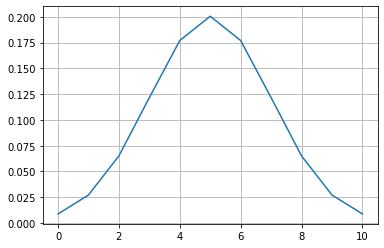

In [0]:
%matplotlib inline
import cardio 

kernel = cardio.kernels.gaussian(size=11)

plt.plot(kernel)
plt.grid("on")
plt.show()

In [0]:
original_batch = batch_with_data.deepcopy()
changed_batch = batch_with_data.deepcopy()

In [0]:
siglen = original_batch["A00007"].signal.shape[1]

noise = np.random.normal(scale=0.01, size=siglen)

changed_batch["A00007"].signal += noise

changed_batch.convolve_signals(kernel=kernel)

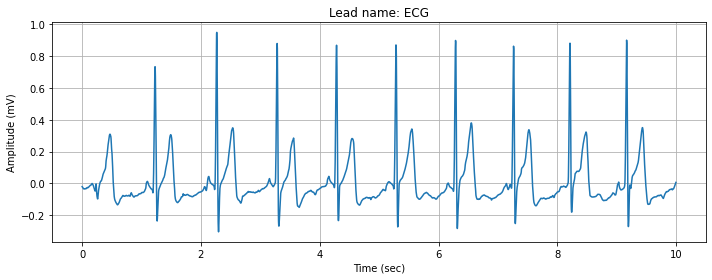

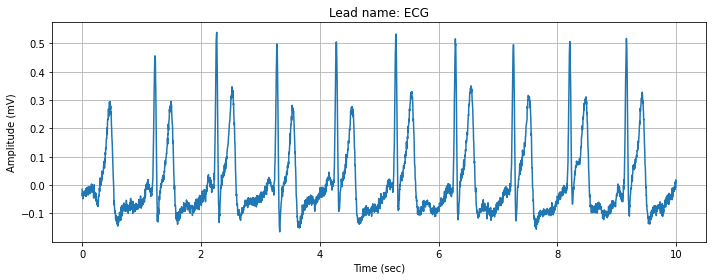

In [131]:
original_batch.show_ecg('A00007', start=0, end=10)

changed_batch.show_ecg('A00007', start=0, end=10)